In [1]:
import keras
import tensorflow as tf

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [7]:
from keras.layers import Dense, MaxPooling2D, Dropout, Conv2D, BatchNormalization, Input, Flatten
from keras.models import Sequential 

In [8]:
model = Sequential([
                    Input(shape=x_train[0].shape),
                    Conv2D(32, (3, 3), activation='relu', padding='same'),
                    BatchNormalization(),
                    Conv2D(32, (3, 3), activation='relu', padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),

                    Conv2D(64, (3, 3), activation='relu', padding='same'),
                    BatchNormalization(),
                    Conv2D(64, (3, 3), activation='relu', padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),

                    Conv2D(128, (3, 3), activation='relu', padding='same'),
                    BatchNormalization(),
                    Conv2D(128, (3, 3), activation='relu', padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),

                    Flatten(),
                    Dropout(0.2),

                    Dense(1024, activation='relu'),
                    Dropout(0.2),

                    Dense(10, activation='softmax')
])

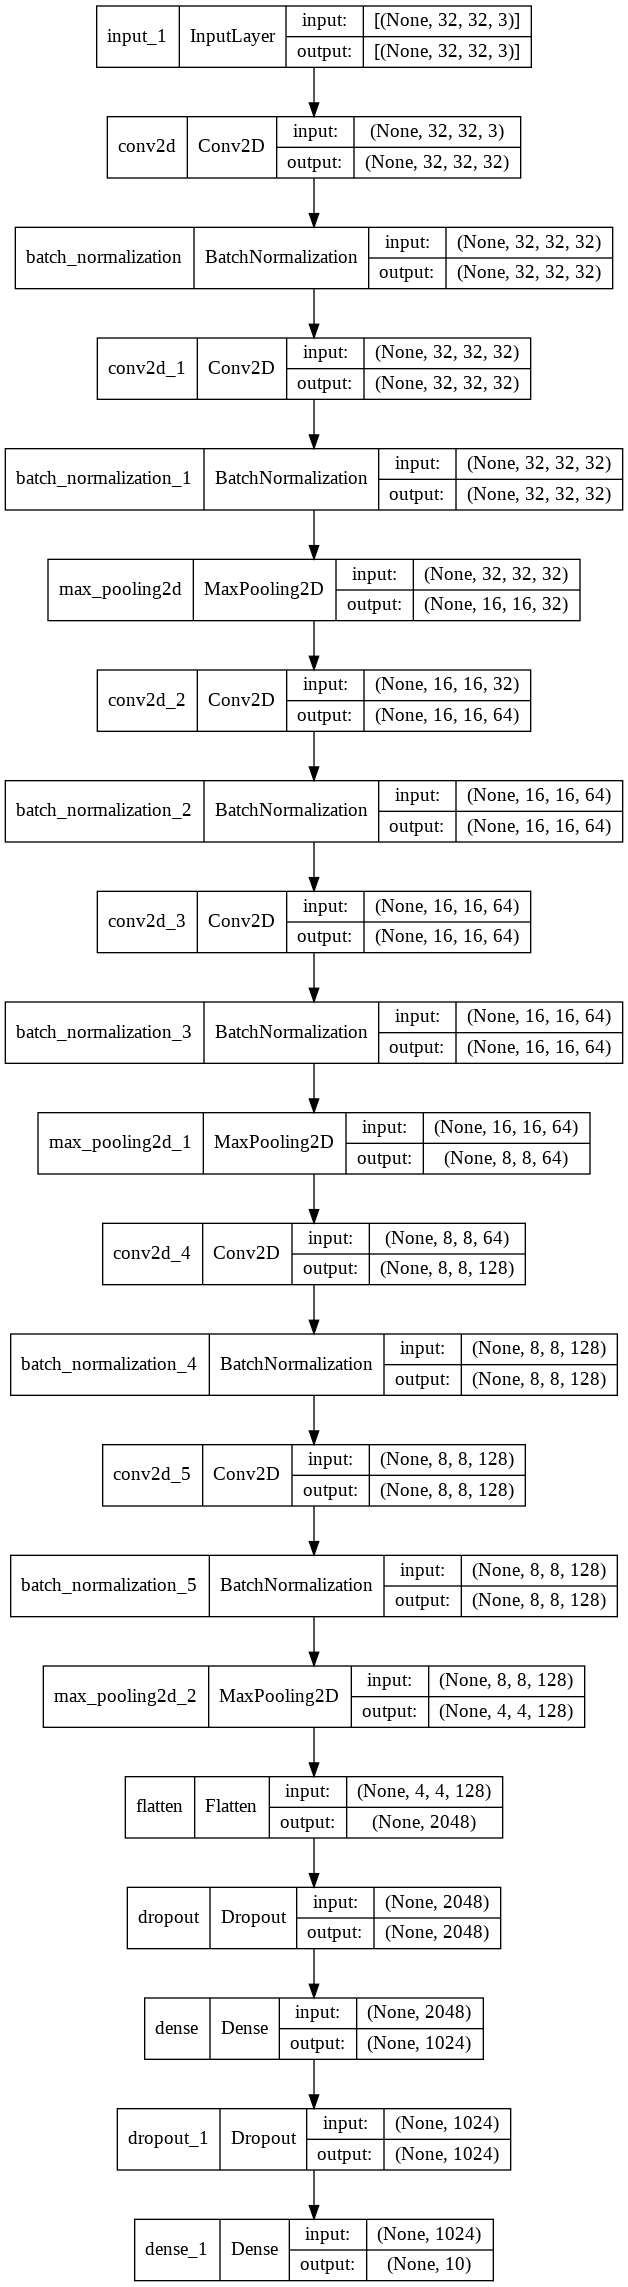

In [9]:
tf.keras.utils.plot_model(
    model, 
    show_shapes=True
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
h1 = model.fit(
    x_train,
    y_train,
    epochs=50,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/50
1563/1563 [==============================] - 49s 25ms/step - loss: 1.3242 - accuracy: 0.5434 - val_loss: 1.2399 - val_accuracy: 0.5720
Epoch 2/50
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8585 - accuracy: 0.7004 - val_loss: 0.7849 - val_accuracy: 0.7334
Epoch 3/50
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7006 - accuracy: 0.7597 - val_loss: 0.8513 - val_accuracy: 0.7210
Epoch 4/50
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5908 - accuracy: 0.7987 - val_loss: 0.6969 - val_accuracy: 0.7649
Epoch 5/50
1563/1563 [==============================] - 34s 22ms/step - loss: 0.5061 - accuracy: 0.8261 - val_loss: 0.7827 - val_accuracy: 0.7488
Epoch 6/50
1563/1563 [==============================] - 37s 24ms/step - loss: 0.4293 - accuracy: 0.8523 - val_loss: 0.6594 - val_accuracy: 0.7912
Epoch 7/50
1563/1563 [==============================] - 41s 26ms/step - loss: 0.3607 - accuracy: 0.8760 - val_loss: 0.6874 -

In [13]:
batch_size = 32
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = data_gen.flow(
    x_train,
    y_train,
    batch_size
)

In [14]:
steps = x_train.shape[0] // batch_size

In [16]:
h1 = model.fit(
    train_generator,
    validation_data=(x_train, y_train),
    steps_per_epoch=steps,
    epochs=50
)

Epoch 1/50
1562/1562 [==============================] - 66s 42ms/step - loss: 0.5198 - accuracy: 0.8320 - val_loss: 0.0929 - val_accuracy: 0.9819
Epoch 2/50
1562/1562 [==============================] - 65s 41ms/step - loss: 0.4348 - accuracy: 0.8559 - val_loss: 0.0785 - val_accuracy: 0.9857
Epoch 3/50
1562/1562 [==============================] - 74s 47ms/step - loss: 0.4053 - accuracy: 0.8659 - val_loss: 0.0962 - val_accuracy: 0.9754
Epoch 4/50
1562/1562 [==============================] - 73s 47ms/step - loss: 0.3897 - accuracy: 0.8680 - val_loss: 0.0731 - val_accuracy: 0.9843
Epoch 5/50
1562/1562 [==============================] - 73s 47ms/step - loss: 0.3686 - accuracy: 0.8768 - val_loss: 0.1073 - val_accuracy: 0.9821
Epoch 6/50
1562/1562 [==============================] - 64s 41ms/step - loss: 0.3538 - accuracy: 0.8816 - val_loss: 0.0736 - val_accuracy: 0.9856
Epoch 7/50
1562/1562 [==============================] - 73s 47ms/step - loss: 0.3403 - accuracy: 0.8852 - val_loss: 0.0820 -

In [17]:
!nvidia-smi

Tue Dec 21 11:17:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    58W / 149W |   1332MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
import matplotlib.pyplot as plt

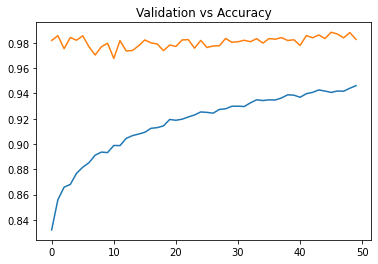

In [19]:
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('Validation vs Accuracy')
plt.show()

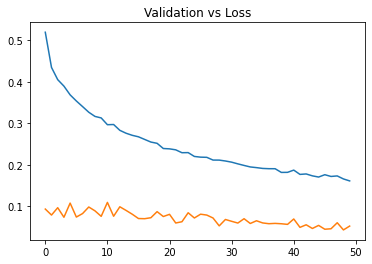

In [20]:
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('Validation vs Loss')
plt.show()

In [21]:
import numpy as np

Original label is automobile and predicted label is truck


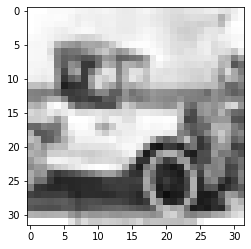

In [25]:
# label mapping
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()

# select the image from our test dataset
image_number = 37

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))


In [24]:
model.save('model.h5')